In [3]:
import numpy as np
import cv2

from matplotlib import pyplot as plt # this lets you draw inline pictures in the notebooks
import pylab # this allows you to control figure size
pylab.rcParams['figure.figsize'] = (8.0, 6.0) # this controls figure size in the notebook

def singleScaleRetinex(img,variance):
    retinex = np.log10(img) - np.log10(cv2.GaussianBlur(img, (0, 0), variance))
    return retinex

def multiScaleRetinex(img, variance_list):
    retinex = np.zeros_like(img)
    for variance in variance_list:
        retinex += singleScaleRetinex(img, variance)
    retinex = retinex / len(variance_list)
    return retinex

def MSR(img, variance_list):
    img = np.float64(img) + 1.0
    img_retinex = multiScaleRetinex(img, variance_list)

    for i in range(img_retinex.shape[2]):
        unique, count = np.unique(np.int32(img_retinex[:, :, i] * 100), return_counts=True)
        for u, c in zip(unique, count):
            if u == 0:
                zero_count = c
                break            
        low_val = unique[0] / 100.0
        high_val = unique[-1] / 100.0
        for u, c in zip(unique, count):
            if u < 0 and c < zero_count * 0.1:
                low_val = u / 100.0
            if u > 0 and c < zero_count * 0.1:
                high_val = u / 100.0
                break            
        img_retinex[:, :, i] = np.maximum(np.minimum(img_retinex[:, :, i], high_val), low_val)
        
        img_retinex[:, :, i] = (img_retinex[:, :, i] - np.min(img_retinex[:, :, i])) / \
                               (np.max(img_retinex[:, :, i]) - np.min(img_retinex[:, :, i])) \
                               * 255
    img_retinex = np.uint8(img_retinex)        
    return img_retinex



def SSR(img, variance):
    img = np.float64(img) + 1.0
    img_retinex = singleScaleRetinex(img, variance)
    for i in range(img_retinex.shape[2]):
        unique, count = np.unique(np.int32(img_retinex[:, :, i] * 100), return_counts=True)
        for u, c in zip(unique, count):
            if u == 0:
                zero_count = c
                break            
        low_val = unique[0] / 100.0
        high_val = unique[-1] / 100.0
        for u, c in zip(unique, count):
            if u < 0 and c < zero_count * 0.1:
                low_val = u / 100.0
            if u > 0 and c < zero_count * 0.1:
                high_val = u / 100.0
                break            
        img_retinex[:, :, i] = np.maximum(np.minimum(img_retinex[:, :, i], high_val), low_val)
        
        img_retinex[:, :, i] = (img_retinex[:, :, i] - np.min(img_retinex[:, :, i])) / \
                               (np.max(img_retinex[:, :, i]) - np.min(img_retinex[:, :, i])) \
                               * 255
    img_retinex = np.uint8(img_retinex)        
    return img_retinex




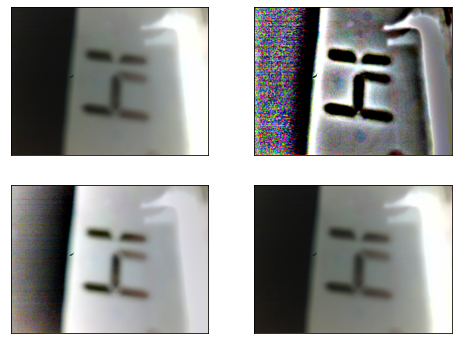

In [6]:
variance_list=[15, 80, 30]
variance=300

img_path = './images/LCD_heating_esp32cam_14.png'
img = cv2.imread(img_path)

#img = cv2.imread('image.jpg')
img_msr=MSR(img,variance_list)
img_ssr=SSR(img, variance)

#cv2.imshow('Original', img)
#cv2.imshow('MSR', img_msr)
#cv2.imshow('SSR', img_ssr)
#cv2.imwrite('SSR.jpg', img_ssr)
#cv2.imwrite('MSR.jpg',img_msr)


images = [img, img_msr, img_ssr, img]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    #plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()